# Python Group Project 4조

## 구성원
- 김윤경
- 김이준
- 이성준
- 최민서


## 패키지 및 데이터 임포트

In [ ]:
######## 한글 폰트 깨짐 시 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#런타임 kill
import os
os.kill(os.getpid(), 9)
#런타임 재실행
!kill -9 -1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# python package import
import pandas as pd
import seaborn as sns
sns.set_context("paper", rc={"figure.figsize": (8, 6)}) #차트 사이즈 조정

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [ ]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# csv 파일을 데이터 프레임으로 저장
humid_raw = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/기상청/18-22 월별 습도.csv", encoding='cp949')
temp_raw = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/기상청/18-22 월별 온도.csv", encoding='cp949')
prec_raw = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/기상청/강수량 2018-2022 월별.csv", encoding='cp949')

In [ ]:
humid_raw

,\t\t지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,\t\t108,서울,Jan-18,48.0,16.0
1,\t\t108,서울,Feb-18,45.0,13.0
2,\t\t108,서울,Mar-18,59.0,13.0
3,\t\t108,서울,Apr-18,55.0,8.0
4,\t\t108,서울,May-18,63.0,22.0
...,...,...,...,...,...
58,\t\t108,서울,Nov-22,65.0,23.0
59,\t\t108,서울,Dec-22,59.0,21.0
60,\t\t,NaN,NaN,NaN,NaN
61,\t,NaN,NaN,NaN,NaN


## 데이터 전처리 - 기상청 날씨 데이터
### 1. 습도

In [ ]:
# 데이터 전처리 - 습도
del humid_raw[humid_raw.columns[0]] # 불필요한 1행 제거
humid_raw = humid_raw.dropna(how="all") # nan이 포함된 행 삭제
print(humid_raw)
print(humid_raw.info())

   지점명      일시  평균습도(%rh)  최저습도(%rh)
0   서울  Jan-18       48.0       16.0
1   서울  Feb-18       45.0       13.0
2   서울  Mar-18       59.0       13.0
3   서울  Apr-18       55.0        8.0
4   서울  May-18       63.0       22.0
5   서울  Jun-18       63.0       19.0
6   서울  Jul-18       68.0       29.0
7   서울  Aug-18       65.0       25.0
8   서울  Sep-18       61.0       23.0
9   서울  Oct-18       59.0       16.0
10  서울  Nov-18       58.0       12.0
11  서울  Dec-18       46.0       16.0
12  서울  Jan-19       46.0       11.0
13  서울  Feb-19       47.0       15.0
14  서울  Mar-19       51.0       10.0
15  서울  Apr-19       51.0       10.0
16  서울  May-19       47.0       12.0
17  서울  Jun-19       61.0       22.0
18  서울  Jul-19       69.0       24.0
19  서울  Aug-19       69.0       28.0
20  서울  Sep-19       65.0       24.0
21  서울  Oct-19       62.0       23.0
22  서울  Nov-19       56.0       14.0
23  서울  Dec-19       58.0       17.0
24  서울  Jan-20       56.0       17.0
25  서울  Feb-20       58.0       14.0
2

In [ ]:
# 일시 데이터를 년도별 월별로 분류
date_raw = humid_raw["일시"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][0])
    year.append("20"+date_raw[i][1])

humid_raw["년"] = year
humid_raw["월"] = month


<ipython-input-263-242baa23a9fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_raw["년"] = year
<ipython-input-263-242baa23a9fc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humid_raw["월"] = month


In [ ]:
# 불필요한 컬럼 제거
del humid_raw["일시"]
del humid_raw["최저습도(%rh)"] # 평균 습도만 사용 예정으로 최저 습도 컬럼 삭제

In [ ]:
# 컬럼 순서 및 이름 변경
humid_raw = humid_raw[["지점명", "년", "월", "평균습도(%rh)"]] # 컬럼 순서 변경
humid_raw = humid_raw.rename(columns={"지점명":"지역"}) # 컬럼 이름 변경
humid_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지역         60 non-null     object 
 1   년          60 non-null     object 
 2   월          60 non-null     object 
 3   평균습도(%rh)  60 non-null     float64
dtypes: float64(1), object(3)
memory usage: 4.4+ KB


In [ ]:
# 데이터 티입 변경
# 년 / 월 > datetime
humid_raw['년'] = pd.to_datetime(humid_raw['년'], format='%Y').dt.year
humid_raw['월'] = pd.to_datetime(humid_raw['월'], format="%b").dt.month

In [ ]:
# 2018년, 2019년 데이터 삭제
humid_raw = humid_raw.loc[humid_raw["년"] >= 2020]
humid_raw = humid_raw.reset_index(drop=True) # 인덱스 재정렬

In [ ]:
humid_raw
# humid_raw.info()

,지역,년,월,평균습도(%rh)
0,서울,2020,1,56.0
1,서울,2020,2,58.0
2,서울,2020,3,46.0
3,서울,2020,4,50.0
4,서울,2020,5,67.0
5,서울,2020,6,68.0
6,서울,2020,7,77.0
7,서울,2020,8,85.0
8,서울,2020,9,71.0
9,서울,2020,10,61.0


### 2. 온도

In [ ]:
# 불필요한 컬럼 제거(평균최저기온, 평균최고기온)
del temp_raw["평균최저기온(℃)"]
del temp_raw["평균최고기온(℃)"]

In [ ]:
#NaN 값 제거
temp_raw = temp_raw.dropna()

In [ ]:
# 지점속 데이터를 서울로 변경
print(temp_raw["지점"].unique) #108.0 > 서울로 변경

temp_raw["지점"] = temp_raw["지점"].replace(108.0, "서울")

<bound method Series.unique of 0     108.0
1     108.0
2     108.0
3     108.0
4     108.0
      ...  
67    108.0
68    108.0
69    108.0
70    108.0
71    108.0
Name: 지점, Length: 72, dtype: float64>


In [ ]:
# 년월 분리 후 날짜로 변경
temp_raw["년월"] = temp_raw["년월"].replace("\t\t\t", "", regex=True)
date_raw = temp_raw["년월"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][1])
    year.append(date_raw[i][0])

temp_raw["년"] = year
temp_raw["월"] = month

In [ ]:
# 년월 컬럼 제거
del temp_raw["년월"]

In [ ]:
# 컬럼 순서 이름, 순서 변경 및 년, 월 데이터 타입 변경
temp_raw = temp_raw.rename(columns={"지점":"지역"}) # 컬럼 이름 변경
temp_raw = temp_raw[["지역", "년", "월", "평균기온(℃)"]]
temp_raw['년'] = pd.to_datetime(temp_raw['년'], format='%Y').dt.year
temp_raw['월'] = pd.to_datetime(temp_raw['월'], format="%m").dt.month

In [ ]:
# 2017, 2018, 2019년 데이터 삭제
temp_raw = temp_raw.loc[temp_raw["년"] >= 2020]
temp_raw = temp_raw.reset_index(drop=True)

In [ ]:
temp_raw

,지역,년,월,평균기온(℃)
0,서울,2020,1,1.6
1,서울,2020,2,2.5
2,서울,2020,3,7.7
3,서울,2020,4,11.1
4,서울,2020,5,18.0
5,서울,2020,6,23.9
6,서울,2020,7,24.1
7,서울,2020,8,26.5
8,서울,2020,9,21.4
9,서울,2020,10,14.3


### 3. 강수량

In [ ]:
# na 값 제거
prec_raw = prec_raw.dropna()

In [ ]:
# 지점속 데이터를 서울로 변경
print(prec_raw["지점"].unique) #108 > 서울로 변경
prec_raw["지점"] = prec_raw["지점"].replace(108, "서울")

KeyError: ignored

In [ ]:
# 년월 분리 후 날짜로 변경
date_raw = prec_raw["년월"].str.split("-")

month = []
year = []

for i in range(len(date_raw)):
    month.append(date_raw[i][0])
    year.append("20"+date_raw[i][1])

prec_raw["년"] = year
prec_raw["월"] = month

In [ ]:
# 년월 컬럼 삭제
del prec_raw["년월"]

In [ ]:
# 컬럼 순서 및 이름 변경
prec_raw = prec_raw[["지점", "년", "월", "강수량(mm)"]] # 컬럼 순서 변경
prec_raw = prec_raw.rename(columns={"지점":"지역"}) # 컬럼 이름 변경


In [ ]:
# 데이터 티입 변경
# 년 / 월 > datetime
prec_raw['년'] = pd.to_datetime(prec_raw['년'], format='%Y').dt.year
prec_raw['월'] = pd.to_datetime(prec_raw['월'], format="%b").dt.month

In [ ]:
# 2018년, 2019년 데이터 삭제
prec_raw = prec_raw.loc[prec_raw["년"] >= 2020]
prec_raw = prec_raw.reset_index(drop=True)

In [ ]:
prec_raw

,지역,년,월,강수량(mm)
0,서울,2020,1,60.5
1,서울,2020,2,53.1
2,서울,2020,3,16.3
3,서울,2020,4,16.9
4,서울,2020,5,112.4
5,서울,2020,6,139.6
6,서울,2020,7,270.4
7,서울,2020,8,675.7
8,서울,2020,9,181.5
9,서울,2020,10,0.0


### 년도 / 월 별 온도, 습도, 강수량 통합 데이터프레임

In [ ]:
# 지역, 년 월을 기준으로 데이터프레임 merge
frames = [temp_raw, humid_raw, prec_raw]
weather_df = pd.concat(frames, axis=1)

# 중복 컬럼 제거
weather_df = weather_df.loc[:,~weather_df.columns.duplicated()]

#지역 컬럼 제거 (추후 음주운전적발 데이터에서 구별로 세분화 예정)
del weather_df["지역"]

In [ ]:
weather_df

,년,월,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1.6,56.0,60.5
1,2020,2,2.5,58.0,53.1
2,2020,3,7.7,46.0,16.3
3,2020,4,11.1,50.0,16.9
4,2020,5,18.0,67.0,112.4
5,2020,6,23.9,68.0,139.6
6,2020,7,24.1,77.0,270.4
7,2020,8,26.5,85.0,675.7
8,2020,9,21.4,71.0,181.5
9,2020,10,14.3,61.0,0.0


## 연도별, 월별 음주음전 적발 기록, 사건사고 기록 데이터 프레임

In [ ]:
# 음주운전 적발 기록 csv read
raw_2020_01 = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/경찰청_음주운전적발기록_20200518.csv", encoding='cp949')
raw_2020_02 = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/경찰청_음주운전적발기록_20200401~20201231.csv", encoding='utf16', sep="\t")
raw_2021 = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/경찰청_음주운전적발기록_20211231.csv", encoding='utf16', sep="\t")
raw_2022 = pd.read_csv("/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/경찰청_음주운전_20221231.csv", encoding='cp949')

In [ ]:
#2020년 1분기 데이터에서 측정거부여부와 연번 제거

del raw_2020_01["연번"]
del raw_2020_01["측정거부여부"]

In [ ]:
#2020 01 번 데이터 프레임의 알콜농도 컬럼에 스페이스바가 포함되어 있음
print(raw_2020_01.columns)

#데이터 프레임 concat을 위해 컬럼명 변명
raw_2020_01 = raw_2020_01.rename(columns={"알콜농도 ":"알콜농도"}) # 컬럼 이름 변경

Index(['성별', '적발횟수', '나이', '알콜농도 ', '측정일시', '관할경찰서'], dtype='object')


In [ ]:
# 2020년 기록을 행으로 결합해서 하나의 데이터 프레임 생성

raw_frames = [raw_2020_01, raw_2020_02]
raw_2020 = pd.concat(raw_frames, axis=0)

In [ ]:
# 적발 횟수 컬럼이 유의미 한가
raw_2020["적발횟수"].unique # 결과는 1만 존재
raw_2021["적발횟수"].unique # 결과는 1만 존재
raw_2022["적발횟수"].unique # 결과는 1만 존재

#따라서 불필요한 요소로 판단 - 제거
del raw_2020["적발횟수"]
del raw_2021["적발횟수"]
del raw_2022["적발횟수"]

In [ ]:
#프로젝트 목표 - 서울에서 발생한 음주 운전 건만을 다룸
#관할 경찰서 string에서 서울이라는 단어가 포함된 행만 남김


raw_2020 = raw_2020[raw_2020["관할경찰서"].str.contains("서울")]
raw_2021 = raw_2021[raw_2021["관할경찰서"].str.contains("서울")]

raw_2022 = raw_2022[raw_2022["관할경찰서"].str.contains("서울")]

In [ ]:
# 인덱스 재정렬
raw_2020 = raw_2020.reset_index(drop=True)
raw_2021 = raw_2021.reset_index(drop=True)
raw_2022 = raw_2022.reset_index(drop=True)

In [ ]:
# NA 값 여부 체크 후 해당 데이터 제거
print(raw_2020.isnull().sum(), end="\n\n") # 존재
print(raw_2021.isnull().sum(), end="\n\n") # 없음
print(raw_2022.isnull().sum(), end="\n\n") # 없음

mv = raw_2020[raw_2020.isnull().any(axis=1)].index # 결측치 인덱스 값 추출
raw_2020 = raw_2020.drop(mv) # NA포함 행 제거
print(raw_2020.isnull().sum(), end="\n\n") #na값 여부 재확인
raw_2020 = raw_2020.reset_index(drop=True) #인덱스 재정렬

성별       0
나이       0
알콜농도     0
관할경찰서    0
년        0
월        0
dtype: int64

성별       0
나이       0
알콜농도     0
관할경찰서    0
년        0
월        0
dtype: int64

성별       0
나이       0
알콜농도     0
관할경찰서    0
년        0
월        0
dtype: int64

성별       0
나이       0
알콜농도     0
관할경찰서    0
년        0
월        0
dtype: int64



In [ ]:
# 나이가 "불명"인 데이터 제거
print(raw_2020[raw_2020["나이"] == "불명"]) # 나이가 불명인 행 추출
print(raw_2021[raw_2021["나이"] == "불명"])
print(raw_2022[raw_2022["나이"] == "불명"])

mv_2_2020 = raw_2020[raw_2020["나이"] == "불명"].index # 인덱스 값 추출
mv_2_2021 = raw_2021[raw_2021["나이"] == "불명"].index
mv_2_2022 = raw_2022[raw_2022["나이"] == "불명"].index
#print(mv_2_2020)

raw_2020 = raw_2020.drop(mv_2_2020) #해당 행 제거
raw_2021 = raw_2021.drop(mv_2_2021)
raw_2022 = raw_2022.drop(mv_2_2022)

print(raw_2020[raw_2020["나이"] == "불명"]) # 나이 컬럼의 유일값 재확인
print(raw_2021[raw_2021["나이"] == "불명"])
print(raw_2022[raw_2022["나이"] == "불명"])

raw_2020 = raw_2020.reset_index(drop=True) #인덱스 재정렬
raw_2021 = raw_2021.reset_index(drop=True) #인덱스 재정렬
raw_2022 = raw_2022.reset_index(drop=True) #인덱스 재정렬

Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []
Empty DataFrame
Columns: [성별, 나이, 알콜농도, 관할경찰서, 년, 월]
Index: []


In [ ]:
# 나이가 "측정거부"인 데이터를 평균값으로 대체
print(len(raw_2020[raw_2020["알콜농도"] == "측정거부"])) #알콜 농도가 측정 거부인 행의 갯수
print(len(raw_2021[raw_2021["알콜농도"] == "측정거부"]))
print(len(raw_2022[raw_2022["알콜농도"] == "측정거부"]))

mv_3_2020 = raw_2020[raw_2020["알콜농도"] == "측정거부"].index # 인덱스 값 추출
mv_3_2021 = raw_2021[raw_2021["알콜농도"] == "측정거부"].index
mv_3_2022 = raw_2022[raw_2022["알콜농도"] == "측정거부"].index
#print(mv_3_2020)

#### 평균값 대치
# 평균값 구하기
avg_2020 = round(raw_2020[raw_2020["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)
avg_2021 = round(raw_2021[raw_2021["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)
avg_2022 = round(raw_2022[raw_2022["알콜농도"]!="측정거부"]["알콜농도"].astype(float).mean(), 3)

# "측정거부"를 평균값으로 변경
raw_2020 = raw_2020.replace("측정거부", avg_2020)
raw_2021 = raw_2021.replace("측정거부", avg_2021)
raw_2022 = raw_2022.replace("측정거부", avg_2022)

print(len(raw_2020[raw_2020["알콜농도"] == "측정거부"])) # 측정거부 행이 있는지 재확인
print(len(raw_2021[raw_2021["알콜농도"] == "측정거부"]))
print(len(raw_2022[raw_2022["알콜농도"] == "측정거부"]))

0
0
0
0
0
0


In [ ]:
# 데이터 형식 변경
'''
성별 - (카데고리 변수) 남 / 녀
나이 - 정수형
알콜농도 - 실수형
측정 일시 - 날짜형
'''
#2020년
raw_2020["성별"] = raw_2020["성별"].astype("category")
raw_2020["나이"] = raw_2020["나이"].astype("int")
raw_2020["알콜농도"] = raw_2020["알콜농도"].astype("float")
raw_2020["측정일시"] = pd.to_datetime(raw_2020["측정일시"])
#2021년
raw_2021["성별"] = raw_2021["성별"].astype("category")
raw_2021["나이"] = raw_2021["나이"].astype("int")
raw_2021["알콜농도"] = raw_2021["알콜농도"].astype("float")
raw_2021["측정일시"] = pd.to_datetime(raw_2021["측정일시"])
#2022년
raw_2022["성별"] = raw_2022["성별"].astype("category")
raw_2022["나이"] = raw_2022["나이"].astype("int")
raw_2022["알콜농도"] = raw_2022["알콜농도"].astype("float")
raw_2022["측정일시"] = pd.to_datetime(raw_2022["측정일시"])

KeyError: ignored

In [ ]:
# 측정일시 년 월 컬럼 생성 / "측정 일시" 컬럼 삭제
#2020년
raw_2020['년'] = raw_2020['측정일시'].dt.year
raw_2020['월'] = raw_2020['측정일시'].dt.month
del raw_2020["측정일시"]
#2021년
raw_2021['년'] = raw_2021['측정일시'].dt.year
raw_2021['월'] = raw_2021['측정일시'].dt.month

del raw_2021["측정일시"]
#2022년
raw_2022['년'] = raw_2022['측정일시'].dt.year
raw_2022['월'] = raw_2022['측정일시'].dt.month
del raw_2022["측정일시"]

In [ ]:
# 2020, 2021, 2022 데이터 merge
frames = [raw_2020, raw_2021, raw_2022]
DUI_raw = pd.concat(frames)
DUI_raw = DUI_raw.reset_index(drop=True) #인덱스 재정렬

In [ ]:
#컬럼 순서 변경
DUI_raw = DUI_raw[["년", "월", "성별", "알콜농도", "관할경찰서"]]

In [ ]:
DUI_raw

,년,월,성별,알콜농도,관할경찰서
0,2020,1,남자,0.210,서울마포경찰서
1,2020,1,남자,0.091,서울용산경찰서
2,2020,1,남자,0.115,서울양천경찰서
3,2020,1,남자,0.119,서울노원경찰서
4,2020,1,남자,0.075,서울강북경찰서
...,...,...,...,...,...
40862,2022,12,남자,0.059,서울강동경찰서
40863,2022,12,남자,0.183,서울강서경찰서
40864,2022,12,남자,0.078,서울영등포경찰서
40865,2022,12,남자,0.139,서울마포경찰서


## 최종 데이터베이스

In [ ]:
# DUI와 Weather data merge
total_df = pd.merge(DUI_raw, weather_df, left_on=["년", "월"], right_on=["년", "월"], how="left")
total_df

,년,월,성별,알콜농도,관할경찰서,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,남자,0.210,서울마포경찰서,1.6,56.0,60.5
1,2020,1,남자,0.091,서울용산경찰서,1.6,56.0,60.5
2,2020,1,남자,0.115,서울양천경찰서,1.6,56.0,60.5
3,2020,1,남자,0.119,서울노원경찰서,1.6,56.0,60.5
4,2020,1,남자,0.075,서울강북경찰서,1.6,56.0,60.5
...,...,...,...,...,...,...,...,...
40862,2022,12,남자,0.059,서울강동경찰서,-2.8,59.0,13.6
40863,2022,12,남자,0.183,서울강서경찰서,-2.8,59.0,13.6
40864,2022,12,남자,0.078,서울영등포경찰서,-2.8,59.0,13.6
40865,2022,12,남자,0.139,서울마포경찰서,-2.8,59.0,13.6


In [ ]:
# 관할구 리스트 생성
sector = {
    "강남구" : ["서울강남경찰서", "서울수서경찰서"],
    "서초구" : [ "서울서초경찰서", "서울방배경찰서"],
    "성북구" : [ "서울성북경찰서", "서울종암경찰서"],
    "은평구" : ["서울서부경찰서", "서울은평경찰서"],
    "종로구" : ["서울종로경찰서", "서울혜화경찰서", "서울특별시경찰청"],
    "중구" : ["서울중부경찰서", "서울남대문경찰서"]
}
new_sector = []
for police in total_df["관할경찰서"]:
    if any(police in sub for sub in sector.values()):
        for k, v in sector.items():
            if police in v:
                new_sector.append(k)
    else:
        new_sector.append(police[2:-3]+"구")


In [ ]:
# 관할구 컬럼 생성 및 컬럼 순서 변경
total_df["관할구"] = new_sector
total_df
total_df = total_df[["년", "월", "성별", "알콜농도", "관할경찰서", "관할구", "평균기온(℃)", "평균습도(%rh)", "강수량(mm)"]]

In [ ]:
# 최종 데이터베이스 데이터 타입 확인
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40867 entries, 0 to 40866
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          40867 non-null  int64  
 1   월          40867 non-null  int64  
 2   성별         40867 non-null  object 
 3   알콜농도       40867 non-null  float64
 4   관할경찰서      40867 non-null  object 
 5   관할구        40867 non-null  object 
 6   평균기온(℃)    40867 non-null  float64
 7   평균습도(%rh)  40867 non-null  float64
 8   강수량(mm)    40867 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.1+ MB


In [ ]:
# 성별 데이터 타입 변경을 category로 변경이 필요
# 따라서 성별의 unique를 확인
print(total_df["성별"].unique())
total_df[total_df["성별"]=="불명"] #성별이 불명인 행 확인

['남자' '여자' '불명']


,년,월,성별,알콜농도,관할경찰서,관할구,평균기온(℃),평균습도(%rh),강수량(mm)
3001,2020,4,불명,0.146,서울구로경찰서,구로구,11.1,50.0,16.9
14308,2021,2,불명,0.030,서울송파경찰서,송파구,2.7,56.0,7.1
20387,2021,8,불명,0.082,서울구로경찰서,구로구,25.9,74.0,211.2
23272,2021,11,불명,0.094,서울금천경찰서,금천구,8.2,68.0,62.4


In [ ]:
# 성별이 불명인 인덱스 추출
unknown_sex = total_df[total_df["성별"] == "불명"].index
total_df = total_df.drop(unknown_sex)
print(total_df["성별"].unique()) # 성별이 불명인 행이 존재하는지 재확인

['남자' '여자']


In [ ]:
# 성별 데이터 타입을 카테고리 타입을 변경
# 여자 = 0, 남자 = 1
total_df['성별'] = total_df['성별'].map({'여자': 0, '남자': 1})

In [ ]:
total_df

,년,월,성별,알콜농도,관할경찰서,관할구,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1,0.210,서울마포경찰서,마포구,1.6,56.0,60.5
1,2020,1,1,0.091,서울용산경찰서,용산구,1.6,56.0,60.5
2,2020,1,1,0.115,서울양천경찰서,양천구,1.6,56.0,60.5
3,2020,1,1,0.119,서울노원경찰서,노원구,1.6,56.0,60.5
4,2020,1,1,0.075,서울강북경찰서,강북구,1.6,56.0,60.5
...,...,...,...,...,...,...,...,...,...
40862,2022,12,1,0.059,서울강동경찰서,강동구,-2.8,59.0,13.6
40863,2022,12,1,0.183,서울강서경찰서,강서구,-2.8,59.0,13.6
40864,2022,12,1,0.078,서울영등포경찰서,영등포구,-2.8,59.0,13.6
40865,2022,12,1,0.139,서울마포경찰서,마포구,-2.8,59.0,13.6


## heatmap(상관관계표)

In [ ]:
# 월별 기준상관관계 확인을 위한 별도의 데이터 프레임 생성
corr_df = total_df

In [ ]:
#월별 음주 적발 건수 추가
DUI_count = list(corr_df.groupby(["년", "월"])["알콜농도"].count())

In [ ]:
# 데이터 프레임 조정 및 음주 적발 건수 추가
corr_df = corr_df.groupby(["년", "월"]).agg({"알콜농도":"mean", "평균기온(℃)":"mean", "평균습도(%rh)":"mean", "강수량(mm)":"mean"}).reset_index()
corr_df["음주적발건수(건)"] = DUI_count
corr_df

,년,월,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm),음주적발건수(건)
0,2020,1,0.110935,1.6,56.0,60.5,921
1,2020,2,0.115705,2.5,58.0,53.1,958
2,2020,3,0.117491,7.7,46.0,16.3,997
3,2020,4,0.119924,11.1,50.0,16.9,1070
4,2020,5,0.126684,18.0,67.0,112.4,1174
5,2020,6,0.129631,23.9,68.0,139.6,1154
6,2020,7,0.131876,24.1,77.0,270.4,1237
7,2020,8,0.137948,26.5,85.0,675.7,1159
8,2020,9,0.133968,21.4,71.0,181.5,1156
9,2020,10,0.117317,14.3,61.0,0.0,1196


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seab

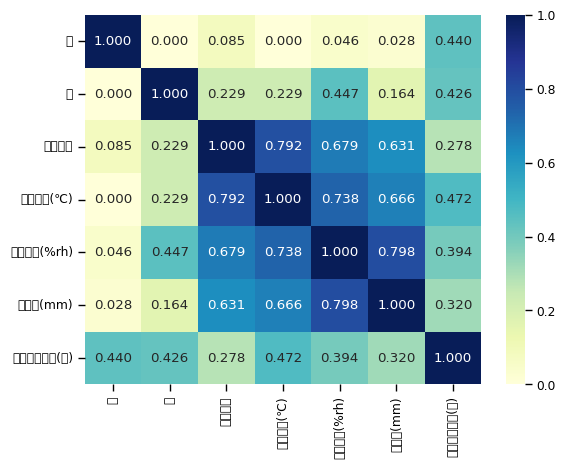

In [ ]:
sns.heatmap(corr_df.corr(), cmap='YlGnBu', annot=True, fmt=".3f")
plt.show()

## heatmap(total_df)

In [ ]:
#관할경찰서, 관할구를 제외한 별도의 데이터프레임 생성
heatmap_df = total_df
del heatmap_df["관할경찰서"]
del heatmap_df["관할구"]
heatmap_df

,년,월,성별,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm)
0,2020,1,1,0.210,1.6,56.0,60.5
1,2020,1,1,0.091,1.6,56.0,60.5
2,2020,1,1,0.115,1.6,56.0,60.5
3,2020,1,1,0.119,1.6,56.0,60.5
4,2020,1,1,0.075,1.6,56.0,60.5
...,...,...,...,...,...,...,...
40862,2022,12,1,0.059,-2.8,59.0,13.6
40863,2022,12,1,0.183,-2.8,59.0,13.6
40864,2022,12,1,0.078,-2.8,59.0,13.6
40865,2022,12,1,0.139,-2.8,59.0,13.6


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/

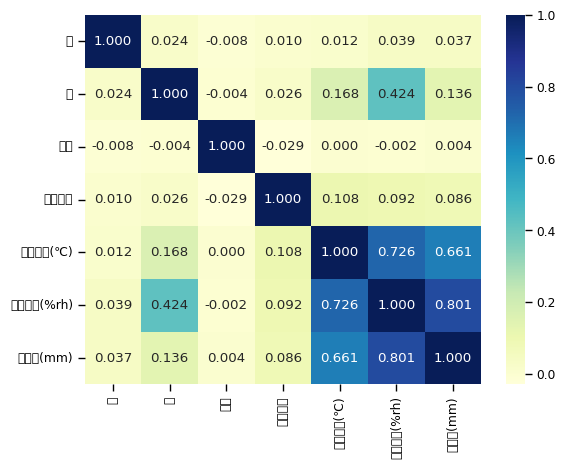

In [ ]:
# seaborn 패키지를 사용해서 heatmap 생성
sns.heatmap(heatmap_df.corr(), cmap='YlGnBu', annot=True, fmt=".3f")
plt.show()

## 데이터베이스 기본통계수치

In [ ]:
#월별 통계수치표
round(corr_df.describe(), 2)

,알콜농도,평균기온(℃),평균습도(%rh),강수량(mm),음주적발건수(건)
count,36.00,36.00,36.00,36.00,36.00
mean,0.12,13.39,64.50,128.14,1135.08
std,0.01,9.93,8.93,151.86,199.28
min,0.11,-2.80,46.00,0.00,761.00
25%,0.12,6.45,57.50,16.75,1006.75
50%,0.12,14.45,64.50,103.60,1142.50
75%,0.13,22.65,71.00,171.60,1259.25
max,0.14,28.10,85.00,675.70,1526.00


In [ ]:
# 시계열 추세 분석
timewise_df = corr_df

In [ ]:
# 년 월을 date로 병합
timewise_df["년"]= timewise_df["년"].astype("str")
timewise_df["월"]= timewise_df["월"].astype("str")
timewise_df["date"] = timewise_df["년"] + "-" + timewise_df["월"]

timewise_df["date"] = pd.to_datetime(timewise_df["date"], format="%Y-%m")

# 년 월 컬럼 삭제
del timewise_df["년"]
del timewise_df["월"]

KeyError: ignored

In [ ]:
timewise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   알콜농도       36 non-null     float64       
 1   평균기온(℃)    36 non-null     float64       
 2   평균습도(%rh)  36 non-null     float64       
 3   강수량(mm)    36 non-null     float64       
 4   음주적발건수(건)  36 non-null     int64         
 5   date       36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.8 KB


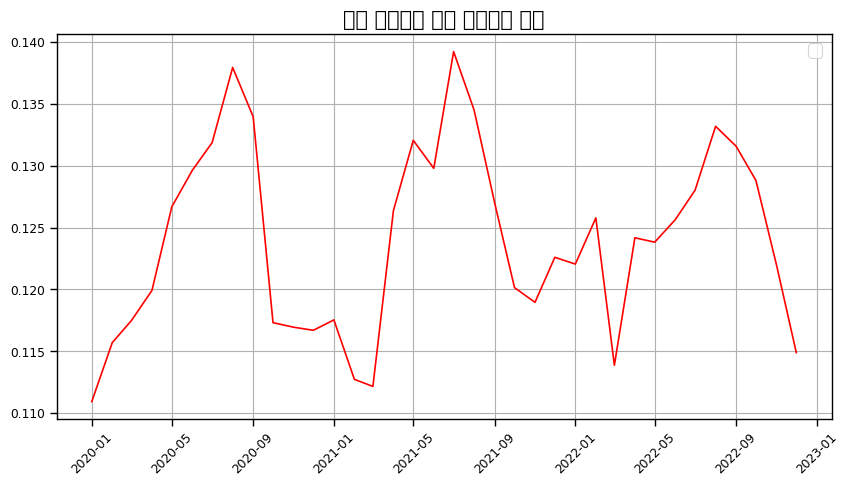

In [ ]:
# 월별 음주운전 적발 평균 알콜농도 추세
plt.figure(figsize=(10, 5))
plt.title("월별 음주운전 평균 알콜농도 추이", fontsize = 15)
plt.plot(timewise_df["date"], timewise_df["알콜농도"], "-", color = "red")
plt.grid()
plt.legend(fontsize = 13)
plt.xticks(rotation = 45)
plt.show()

# 민서님:
* 알콜농도 - 평균기온
* 알콜농도 - 평균습도
* 알콜농도 - 강수량
* 음주적발건수 - 평균기온

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 알콜농도 - 평균기온
corr_df = corr_df.groupby(['년','월']).agg({"알콜농도":"mean", "평균기온(℃)":"mean", "평균습도(%rh)":"mean", "강수량(mm)":"mean"}).reset_index()
corr_df["음주적발건수(건)"] = DUI_count

# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['알콜농도']
y_data = corr_df['평균기온(℃)']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('알콜농도와 평균기온')
plt.xlabel('알콜농도')
plt.ylabel('평균기온(℃)')

# Display the scatterplot
plt.legend()
plt.show()

KeyError: ignored

In [ ]:
# 알콜농도 - 평균습도
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['평균습도(%rh)']
y_data = corr_df['알콜농도']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('알콜농도와 평균습도')
plt.xlabel('알콜농도')
plt.ylabel('평균습도(%rh)')

# Display the scatterplot
plt.legend()
plt.show()

In [ ]:
# 알콜농도 - 강수량
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['강수량(mm)']
y_data = corr_df['알콜농도']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

# Create the line
m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('알콜농도와 강수량')
plt.xlabel('알콜농도')
plt.ylabel('강수량(mm)')

# Display the scatterplot
plt.legend()
plt.show()

In [ ]:
# 음주적발건수 - 평균기온
# DataFrame named total_df with columns 'x_column' and 'y_column'
x_data = corr_df['평균기온(℃)']
y_data = corr_df['음주적발건수(건)']

# Create the scatterplot
plt.scatter(x_data, y_data, color='blue', marker='o', s=5)

m, b = np.polyfit(x_data, y_data, 1)
line_equation = f'y = {m:.2f}x + {b:.2f}'
plt.plot(x_data, m*x_data+b, color='r', alpha=0.5, label=line_equation)

plt.title('음주적발건수와 평균기온')
plt.xlabel('음주적발건수(건))')
plt.ylabel('평균기온(℃)')

# Display the scatterplot
plt.legend()
plt.show()

In [ ]:
# DataFrame named total_df with columns 'x_column' and 'y_column'
y_data = corr_df['음주적발건수(건)']
x_data = range(len(y_data))

# Create the scatterplot
plt.scatter(x_data, y_data, label='Scatterplot', color='blue', marker='o', s=5)

plt.title('음주적발건수')
plt.xlabel('Cases')
plt.ylabel('음주적발건수(건)')

# Display the scatterplot
plt.show()

#윤경님

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [104]:
# total data frame 다시 보기
print(total_df)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import numpy as np
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import random
import matplotlib.image as mpimg

          년   월  성별   알콜농도  평균기온(℃)  평균습도(%rh)  강수량(mm)
0      2020   1   1  0.210      1.6       56.0     60.5
1      2020   1   1  0.091      1.6       56.0     60.5
2      2020   1   1  0.115      1.6       56.0     60.5
3      2020   1   1  0.119      1.6       56.0     60.5
4      2020   1   1  0.075      1.6       56.0     60.5
...     ...  ..  ..    ...      ...        ...      ...
40862  2022  12   1  0.059     -2.8       59.0     13.6
40863  2022  12   1  0.183     -2.8       59.0     13.6
40864  2022  12   1  0.078     -2.8       59.0     13.6
40865  2022  12   1  0.139     -2.8       59.0     13.6
40866  2022  12   1  0.159     -2.8       59.0     13.6

[40863 rows x 7 columns]


In [ ]:
plt.rc('font', family='NanumBarunGothic')

         평균기온(℃)
년    월          
2020 1       1.6
     2       2.5
     3       7.7
     4      11.1
     5      18.0
     6      23.9
     7      24.1
     8      26.5
     9      21.4
     10     14.3
     11      8.0
     12     -0.3
2021 1      -2.4
     2       2.7
     3       9.0
     4      14.2
     5      17.1
     6      22.8
     7      28.1
     8      25.9
     9      22.6
     10     15.6
     11      8.2
     12      0.6
2022 1      -2.2
     2      -1.1
     3       7.7
     4      14.8
     5      19.1
     6      23.3
     7      27.3
     8      25.7
     9      22.4
     10     14.6
     11     10.0
     12     -2.8


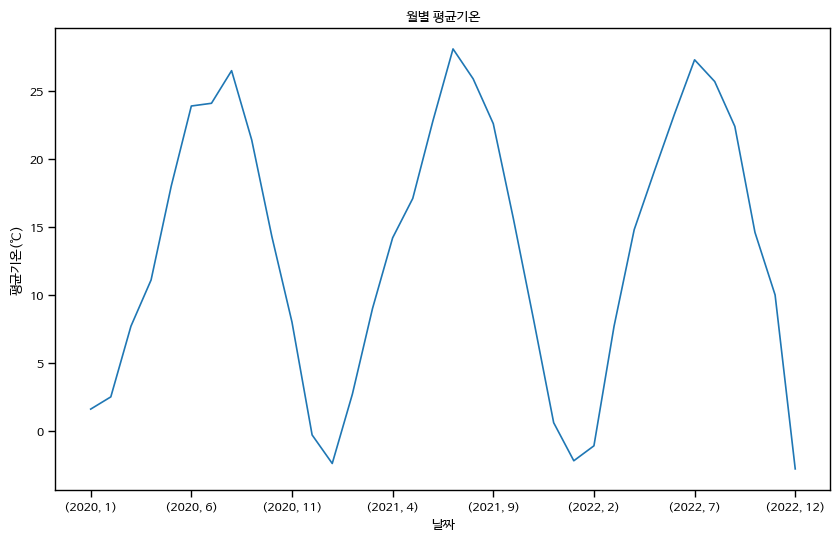

In [ ]:
temperature_data = total_df.groupby(['년', '월'])['평균기온(℃)'].mean().reset_index()

# 새로운 데이터프레임을 생성합니다.
new_df = pd.DataFrame(temperature_data)

# "년"과 "월"을 인덱스로 설정합니다.
new_df.set_index(['년', '월'], inplace=True)

# 데이터프레임을 출력하여 확인합니다.
print(new_df)
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# '년'과 '월'을 x축으로, '평균기온(℃)'을 y축으로 설정하여 라인 그래프를 그립니다.
new_df['평균기온(℃)'].plot()

# 그래프 제목과 라벨을 추가합니다.
plt.title('월별 평균기온')
plt.xlabel('날짜')
plt.ylabel('평균기온(℃)')

# 그래프를 표시합니다.
plt.show()

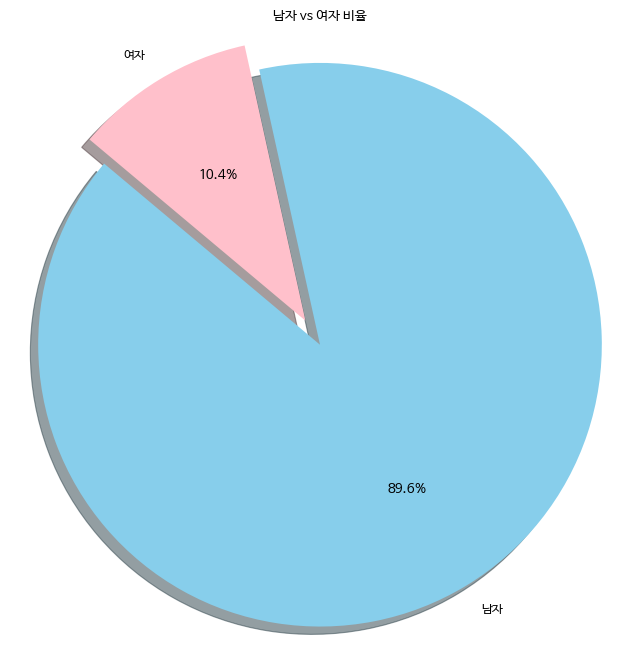

In [ ]:
# 남자와 여자의 수를 계산
남자_count = (total_df['성별'] == 1).sum()
여자_count = (total_df['성별'] == 0).sum()

# 비율을 계산
비율 = [남자_count, 여자_count]

# 라벨 설정
라벨 = ['남자', '여자']

# 색상 설정
색상 = ['skyblue', 'pink']

explode=(0,0.1)

# 원 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(비율, labels=라벨, colors=색상, autopct='%1.1f%%', startangle=140,explode=explode, shadow=True)
plt.title('남자 vs 여자 비율')
plt.axis('equal')

# 그래프 표시
plt.show()

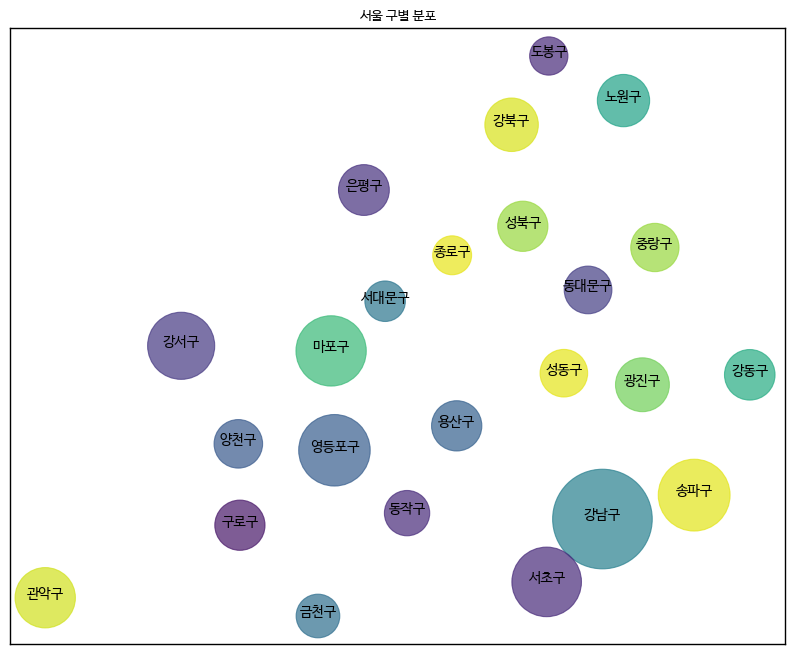

In [102]:

구별_데이터 = [
    ('강남구', (37.4967, 127.0630), 5145),
    ('강동구', (37.5504, 127.1470), 1325),
    ('강북구', (37.6435, 127.0112), 1482),
    ('강서구', (37.5612, 126.8228), 2333),
    ('관악구', (37.4674, 126.7453), 1886),
    ('광진구', (37.5467, 127.0858), 1503),
    ('구로구', (37.4944, 126.8563), 1307),
    ('금천구', (37.4606, 126.9008), 987),
    ('노원구', (37.6525, 127.0750), 1417),
    ('도봉구', (37.6691, 127.0324), 759),
    ('동대문구',(37.5820, 127.0548), 1178),
    ('동작구', (37.4989, 126.9516), 1064),
    ('마포구', (37.5593, 126.9083), 2562),
    ('서대문구',(37.5778, 126.9391), 851),
    ('서초구', (37.4733, 127.0312), 2508),
    ('성동구', (37.5510, 127.0410), 1173),
    ('성북구', (37.6057, 127.0176), 1308),
    ('송파구', (37.5056, 127.1153), 2673),
    ('양천구', (37.5247, 126.8554), 1221),
    ('영등포구',(37.5223, 126.9102), 2651),
    ('용산구', (37.5314, 126.9799), 1310),
    ('은평구', (37.6192, 126.9270), 1339),
    ('종로구', (37.5949, 126.9773), 785),
    ('중랑구', (37.5978, 127.0929), 1209)
]

# 데이터를 분리
구명, 좌표, 데이터 = zip(*구별_데이터)

# 좌표를 90도 회전
돌려진_좌표 = [(coord[1], coord[0]) for coord in 좌표]

# 색상 리스트 생성 (랜덤한 색상)
colors = [plt.cm.viridis(random.random()) for _ in range(len(구명))]

# 버블 차트 그리기
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*돌려진_좌표), s=데이터, c=colors, alpha=0.7)

# 각 점에 구 이름 표시
for i, 구 in enumerate(구명):
    plt.annotate(구, 돌려진_좌표[i], fontsize=10, ha='center')

plt.title('서울 구별 분포')

# x label과 y label 없애기
plt.xticks([])
plt.yticks([])
plt.show()


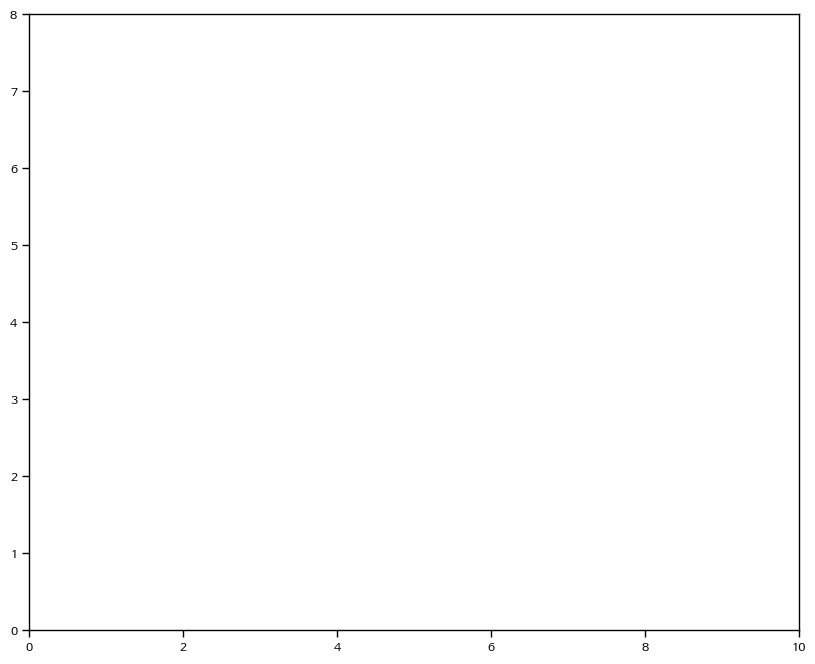

In [107]:

background_image = mpimg.imread('/content/drive/MyDrive/FastCampus/Python_Project_4조/data/음주운전적발기록/Seoul Map.jpeg')

# 그래프 생성 및 배경 이미지 추가
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(background_image, extent=[0, 10, 0, 8])
